In [2]:
%run imports.ipynb

In [3]:
from biopandas.pdb import PandasPdb

In [89]:
pdb = PandasPdb().read_pdb('source_data/AF-Q9Y6K1-F1-model_v3.pdb')

In [32]:
stability_scores = pd.read_csv('source_data/stability_scores.csv')

In [33]:
stability_scores

,aa_position,stability_ratio_normalized_to_WT
0,12,0.855598
1,30,0.836011
2,90,1.084197
3,181,1.044739
4,183,1.060101
...,...,...
243,907,0.392546
244,908,0.407881
245,909,0.327513
246,910,0.558161


Text(0, 0.5, 'Stability score')

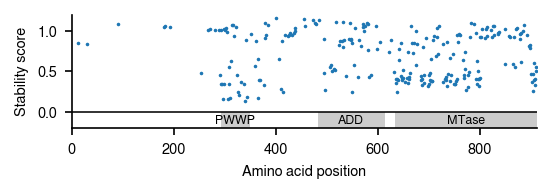

In [59]:
import matplotlib.patches as patches

fig = plt.figure(figsize=(4, 1))
ax = fig.add_subplot(111)

ax.scatter(
    stability_scores['aa_position'],
    stability_scores['stability_ratio_normalized_to_WT'],
    s=2,
)

domain_height = 0.2

rect = patches.Rectangle((292, -domain_height), 350 - 292, domain_height, linewidth=0.75, edgecolor='none', facecolor='0.8')
ax.add_patch(rect)
ax.text((292 + 350) // 2, -domain_height / 1.9, 'PWWP', ha='center', va='center', fontsize=6)

rect = patches.Rectangle((482, -domain_height), 614 - 482, domain_height, linewidth=0.75, edgecolor='none', facecolor='0.8')
ax.add_patch(rect)
ax.text((482 + 614) // 2, -domain_height / 1.9, 'ADD', ha='center', va='center', fontsize=6)

rect = patches.Rectangle((634, -domain_height), 912 - 634, domain_height, linewidth=0.75, edgecolor='none', facecolor='0.8')
ax.add_patch(rect)
ax.text((634 + 912) // 2, -domain_height / 1.9, 'MTase', ha='center', va='center', fontsize=6)

ax.axhline(0, lw=0.75, c='k')
ax.set_xlim([0, 912])
ax.set_ylim(-domain_height, 1.2)

for d in ['top', 'right']:
    ax.spines[d].set_visible(False)
    
ax.set_xlabel('Amino acid position')
ax.set_ylabel('Stability score')

In [103]:
pdb = PandasPdb().read_pdb('source_data/AF-Q9Y6K1-F1-model_v3.pdb')
af_result = pdb.df['ATOM'].drop_duplicates('residue_number')

In [104]:
af_result.head(3)

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,blank_3,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,MET,,A,1,,,-9.652,15.736,49.513,1.0,37.43,,,N,NaN,117
8,ATOM,9,,N,,PRO,,A,2,,,-12.224,14.809,51.876,1.0,41.24,,,N,NaN,125
15,ATOM,16,,N,,ALA,,A,3,,,-14.198,11.743,52.793,1.0,40.09,,,N,NaN,132


In [105]:
# Get DNMT3A amino acid sequence.
out = !curl -s https://rest.uniprot.org/uniprotkb/Q9Y6K1.fasta
seq = ''.join(out[1:])

In [98]:
seq.index('CVD')

561

In [99]:
af_result['absolute_idx'] = range(562, 562 + len(af_result))

/data/project/dohoon/miniconda3/envs/dnmt3a/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [107]:
af_result = af_result.merge(stability_scores, left_on='residue_number', right_on='aa_position')
af_result['is_ins'] = af_result['stability_ratio_normalized_to_WT'] < 0.75

af_result[['residue_number', 'b_factor', 'stability_ratio_normalized_to_WT', 'is_ins']].rename({
    'b_factor': 'pLDDT',
    'is_ins': 'is_destabilizing_mutation',
}, axis=1).to_csv('source_data/alphafold2_dnmt3a_stability.csv', index=False)

In [109]:
stability_scores[stability_scores.aa_position == 736]

,aa_position,stability_ratio_normalized_to_WT
168,736,0.315882


In [118]:
'+'.join(stability_scores[stability_scores.stability_ratio_normalized_to_WT < 0.75].aa_position.astype(str).values)

'254+290+293+295+297+298+307+308+309+310+312+324+326+328+332+337+339+344+359+365+366+368+369+376+407+410+414+494+497+507+508+511+514+517+537+549+554+562+583+586+623+631+635+636+637+638+639+642+646+647+648+649+650+653+657+659+660+661+662+663+669+676+684+685+686+687+690+691+699+700+701+702+703+704+705+706+707+714+718+729+731+733+734+736+737+741+742+743+747+749+751+752+754+755+768+769+770+771+772+774+777+778+780+793+794+795+796+797+798+799+801+849+865+869+881+901+902+904+905+906+907+908+909+910+911'

In [119]:
'+'.join(stability_scores[stability_scores.stability_ratio_normalized_to_WT >= 0.75].aa_position.astype(str).values)

'12+30+90+181+183+192+267+272+281+288+292+299+301+302+304+314+316+318+322+342+352+361+378+379+380+385+400+413+419+424+426+428+431+436+437+438+455+458+474+477+478+484+495+518+525+527+529+531+532+533+543+545+547+548+550+556+563+567+571+572+573+575+579+580+581+596+598+604+627+641+645+665+668+672+675+677+688+695+709+710+716+717+720+728+735+756+758+759+761+781+783+789+792+800+803+804+811+813+814+815+822+825+826+828+829+835+836+838+850+857+860+868+872+873+879+880+882+884+886+893+896+898+899'

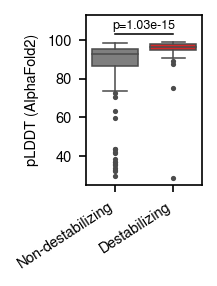

In [110]:
box_kws = {
    'flierprops': {'marker': '.', 'markersize': 3},
    'palette': ['C7', 'C3'],
    'saturation': 1.0,
}

d = pd.read_csv('source_data/alphafold2_dnmt3a_stability.csv')

stat, p = stats.mannwhitneyu(d[d.is_destabilizing_mutation].pLDDT, d[~d.is_destabilizing_mutation].pLDDT, )

fig = plt.figure(figsize=(1, 1.5))
ax = fig.add_subplot(111)

sns.boxplot(data=d, x='is_destabilizing_mutation', y='pLDDT', **box_kws)

ax.set_xticklabels(['Non-destabilizing', 'Destabilizing'], rotation=33, ha='right')

ax.set_xlabel('')
ax.set_ylabel('pLDDT (AlphaFold2)')

ax.set_ylim([ax.get_ylim()[0], 113])
ax.text(0.5, 106, f'p={p:.3g}', ha='center', fontsize=6)
ax.plot([0, 1], [103, 103], c='k', lw=0.75)

save_figures('source_data_figures/dnmt3a_alphafold_pLDDT/alphafold2_dnmt3a_stability')

In [29]:
d.sort_values('pLDDT')

,residue_number,pLDDT,stability_ratio_normalized_to_WT,is_destabilizing_mutation
6,254,28.66,0.481329,True
62,438,29.63,1.000848,False
2,90,32.12,1.084197,False
60,436,32.75,0.969603,False
61,437,33.63,1.043213,False
...,...,...,...,...
113,637,98.66,0.251787,True
111,635,98.67,0.405980,True
150,703,98.69,0.481890,True
152,705,98.77,0.387536,True


In [59]:
d['log_pLDDT'] = np.log2(d.pLDDT + 1)